In [18]:
# Caminho base para imagens
from pathlib import Path

# Caminho do diretório atual do notebook
NOTEBOOK_DIR = Path.cwd()

# Caminho para a pasta 'images', que está no mesmo nível da pasta 'notebooks'
IMAGE_DIR = NOTEBOOK_DIR.parent / "images"

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SEU_USUARIO/vis101-fundamentos-visao/blob/main/notebooks/00_intro_to_digital_images.ipynb)

📌 **Nota para usuários do Google Colab**:

Se você estiver executando o notebook no **Google Colab**, é recomendável usar a função `cv2_imshow()` (do módulo `google.colab.patches`) ao trabalhar com imagens carregadas ou processadas com o OpenCV.

```python
from google.colab.patches import cv2_imshow
```

# 📘 1 – Fundamentos do Processamento Digital de Imagens

Este notebook cobre os principais conceitos introdutórios de imagens digitais, incluindo amostragem, quantização, visualização e operações básicas. Baseado na bibliografia de Gonzalez & Woods e Szeliski.

## Imagens Digitais

Uma **imagem monocromática** (ou imagem em tons de cinza) pode ser modelada matematicamente por uma função bidimensional:

$$
f : \mathbb{R}^2 \to \mathbb{R}
$$

A amplitude de $f(x, y)$, ou seja, o valor da função no ponto espacial $(x, y)$, é chamada de **intensidade** ou **nível de cinza**. Este valor está relacionado a alguma grandeza física, determinada pelo sensor ou dispositivo de aquisição — por exemplo, pode representar a energia luminosa refletida por uma superfície. Na prática, consideramos imagens com valores finitos, isto é, $|f(x, y)| < \infty$.

É comum aplicar uma transformação afim nos valores da imagem para normalizar sua amplitude:

$$
f \leftarrow af + b \quad \text{com } f \in [0, 1]
$$

Essa operação facilita o processamento e análise da imagem digital.

### Da imagem contínua à imagem digital

Uma **imagem digital** é obtida a partir da função contínua $f(x, y)$ por dois processos fundamentais:

1. **Amostragem** – discretização das coordenadas espaciais $x$ e $y$;
2. **Quantização** – discretização dos valores de intensidade $f(x, y)$.

O resultado é uma matriz discreta:

$$
M = (m_{ij}), \quad i \in [0, W-1], \quad j \in [0, H-1], \quad m_{ij} \in [0, L-1]
$$

Aqui, $W$ e $H$ representam, respectivamente, a **largura** e a **altura** (em pixels), e $L$ é o número de **níveis de quantização**.

Cada elemento $m_{ij}$ da matriz corresponde a uma amostra da função contínua:

$$
m_{ij} = q(f(x_0 + i \cdot \Delta x,\; y_0 + j \cdot \Delta y))
$$

onde $\Delta x$ e $\Delta y$ são os passos de amostragem, e $q: \mathbb{R} \to \{0, \dots, L-1\}$ é a função de quantização.

### Representação computacional

Imagens em tons de cinza geralmente utilizam **8 bits por pixel**, ou seja, $L = 2^8 = 256$ níveis de cinza — de 0 (preto) a 255 (branco).

Durante o processamento, é comum converter os valores inteiros para `float` (ex.: `float32`), realizar as operações matemáticas e depois re-quantizar em 8 bits para armazenamento.

Em aplicações como imagens médicas, usa-se maior profundidade (ex.: 10 ou 12 bits por pixel) para evitar artefatos visuais da quantização.

### Imagens coloridas

Imagens RGB são compostas por três imagens monocromáticas correspondentes aos canais:

- R: vermelho (Red)
- G: verde (Green)
- B: azul (Blue)

Cada pixel é representado por 3 bytes, totalizando $2^{24} \approx 16.8$ milhões de cores. Técnicas aplicadas a imagens monocromáticas podem ser aplicadas a cada canal separadamente.

### Resolução espacial e de intensidade

- **Resolução espacial**: densidade de pixels por unidade de comprimento (ex.: dpi). Muitas vezes confundida com a dimensão da imagem (ex.: 1920×1080), mas deve ser referenciada em unidades físicas (cm, mm, etc.).
- **Resolução de intensidade**: número de níveis discretos de cinza. Está ligada à profundidade de bits da imagem.

### Compressão

O número de bits necessários para armazenar uma imagem é:

$$
b = W \cdot H \cdot \log_2(L)
$$

Como esse valor pode ser elevado, utiliza-se compressão (como JPEG) para reduzir o tamanho, explorando **redundância espacial e estatística**.

## Manipulação Básica de Imagens em Python

### **1. PIL — Python Imaging Library**

**PIL** (Python Imaging Library), atualmente mantida como Pillow, é uma biblioteca fundamental para operações básicas com imagens. Ela permite ler, salvar, converter e manipular imagens de maneira simples e direta, suportando os principais formatos de arquivo (JPEG, PNG, BMP, GIF, entre outros).

#### **Carregar uma imagem**

A principal interface é o módulo Image, com o qual podemos abrir uma imagem:

In [33]:
from PIL import Image
import numpy as np

# Carregando a imagem
img = Image.open(IMAGE_DIR / 'hexapod.jpg')

# Informações básicas com PIL
print("📦 Tipo do objeto:", type(img))
print("🎨 Modo da imagem (ex.: 'RGB', 'L'):", img.mode)
print("📐 Dimensões (largura x altura):", img.size)


📦 Tipo do objeto: <class 'PIL.JpegImagePlugin.JpegImageFile'>
🎨 Modo da imagem (ex.: 'RGB', 'L'): RGB
📐 Dimensões (largura x altura): (512, 512)


#### **Converter para Array**

Uma vez carregada a imagem com `PIL`, é possível convertê-la diretamente para um array NumPy com o comando `np.array(img)`. Esse passo é essencial, pois nos permite tratar a imagem como uma **matriz multidimensional**, facilitando operações matemáticas, transformações e análise pixel a pixel.

O objeto resultante será um array cujas dimensões e tipo de dados dependem do tipo de imagem:

- Para imagens **em tons de cinza**, teremos um array 2D de shape `(altura, largura)`.
- Para imagens **RGB**, o array será 3D, com shape `(altura, largura, 3)` — onde o terceiro eixo representa os três canais de cor (Red, Green, Blue).
- O tipo de dado mais comum é `uint8`, significando inteiros de 0 a 255 por canal, padrão em imagens digitais de 8 bits.

Essas informações estruturais são fundamentais para sabermos como acessar e manipular os pixels de forma controlada — seja para aplicar filtros, transformar cores ou visualizar regiões específicas da imagem.


In [34]:
# Convertendo para array NumPy
img_np = np.array(img)

# Informações sobre o array
print("🧮 Tipo de dados dos pixels:", img_np.dtype)
print("🔢 Shape do array:", img_np.shape)

🧮 Tipo de dados dos pixels: uint8
🔢 Shape do array: (512, 512, 3)


#### **Visualização da imagem**

Após carregar a imagem com o PIL, temos duas formas principais de exibi-la:

- Usando `img.show()`, que abre a imagem em um visualizador externo do sistema operacional.
- Usando `matplotlib.pyplot.imshow()`, que permite visualizar a imagem diretamente no notebook, com suporte a títulos, anotações e controle dos eixos.

	> ⚠️ `img.show()` é útil para testes rápidos, mas não é ideal para documentos interativos como notebooks.

In [28]:
# Exibir imagem com PIL no Jupyter Notebook
img.show()

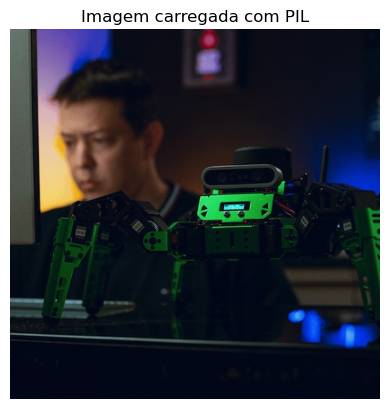

In [37]:
# Exibir imagem com Matplotlib
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')  # Remove os eixos para melhor visualização
plt.title("Imagem carregada com PIL")
plt.show()


#### **Converter imagens para outros formatos**

Vamos agora converter a imagem RGB para escala de cinza usando o método `.convert('L')`. Em seguida, exibimos a imagem com `matplotlib` e inspecionamos o array resultante para verificar que ele possui apenas duas dimensões (altura × largura), como esperado para imagens monocromáticas.

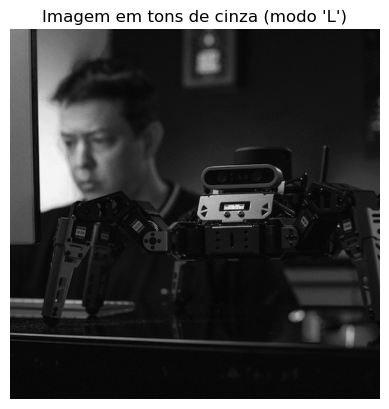

📐 Dimensões (shape): (512, 512)
🧮 Tipo de dado: uint8


In [36]:
# Convertendo para escala de cinza e exibindo
gray = Image.open(IMAGE_DIR / 'hexapod.jpg').convert('L')

# Exibindo com matplotlib
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.title("Imagem em tons de cinza (modo 'L')")
plt.show()

# Convertendo para array NumPy e exibindo shape
gray_np = np.array(gray)
print("📐 Dimensões (shape):", gray_np.shape)
print("🧮 Tipo de dado:", gray_np.dtype)


#### **Criar miniatura (thumbnail)**

Redimensiona a imagem proporcionalmente para que caiba dentro de um retângulo (ex.: 128×128). Isso é útil para gerar versões reduzidas de imagens em visualizações rápidas ou aplicações com restrição de resolução.

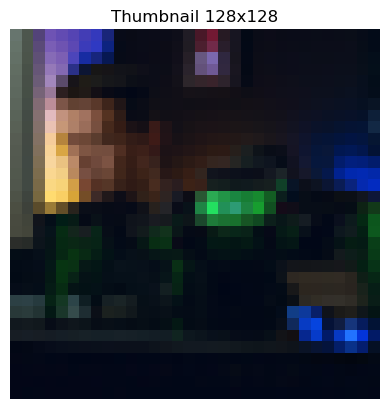

In [ ]:
# img.show()
thumbnail_img = img.copy()
thumbnail_img.thumbnail((32, 32))

plt.imshow(thumbnail_img)
plt.axis('off')
plt.title("Thumbnail 32x32")
plt.show()

#### **Recortar e colar região**

Com o método `.crop()`, podemos selecionar uma sub-região da imagem original especificando um retângulo delimitado por `(left, upper, right, lower)`. Essa região pode ser manipulada (ex.: rotacionada) e colada de volta na imagem original com `.paste()`.

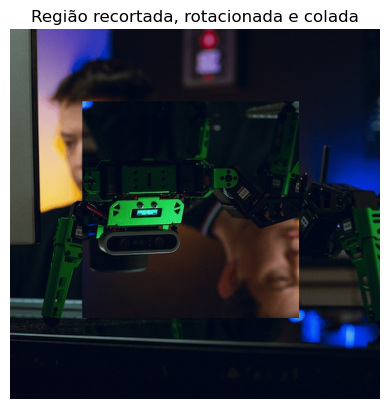

In [40]:
box = (100, 100, 400, 400)  # (left, upper, right, lower)
region = img.crop(box)

# Rotacionando a região
region_rotated = region.transpose(Image.ROTATE_180)

# Colando de volta
pasted_img = img.copy()
pasted_img.paste(region_rotated, box)

plt.imshow(pasted_img)
plt.axis('off')
plt.title("Região recortada, rotacionada e colada")
plt.show()


#### **Redimensionar e rotacionar**

O método `.resize()` permite alterar as dimensões da imagem para valores específicos, enquanto `.rotate()` realiza uma rotação anti-horária do conteúdo. Ambas as operações geram novas imagens manipuladas, sem alterar a original.

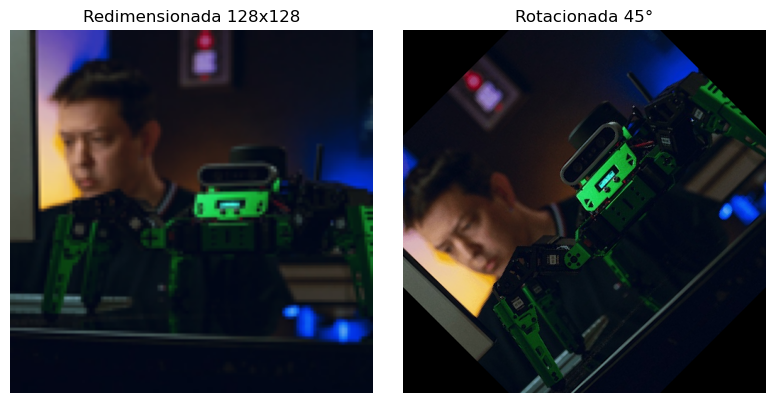

In [41]:
resized = img.resize((128, 128))
rotated = img.rotate(45)  # em graus, sentido anti-horário

# Exibindo lado a lado
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].imshow(resized)
axes[0].set_title("Redimensionada 128x128")
axes[0].axis('off')

axes[1].imshow(rotated)
axes[1].set_title("Rotacionada 45°")
axes[1].axis('off')

plt.tight_layout()
plt.show()

#### **Salvar imagem com novo formato e caminho**

Vamos agora redimensionar a imagem para **128×128 pixels** e salvá-la no formato **PNG**. Isso é útil, por exemplo, para criar versões otimizadas de imagens (thumbnails) para exibição em sites ou visualizações rápidas.

O método `thumbnail()` redimensiona a imagem mantendo a proporção, enquanto o método `save()` permite alterar o **formato** do arquivo simplesmente mudando a extensão. O formato da imagem de saída (JPEG, PNG, etc.) é inferido automaticamente pela extensão fornecida no caminho de destino.

In [45]:
from PIL import Image

# Abrir a imagem original (JPG)
img = Image.open(IMAGE_DIR / 'hexapod.jpg')

# Redimensionar mantendo a proporção (thumbnail in-place)
img.thumbnail((128, 128))

# Novo caminho com extensão .png
output_path = IMAGE_DIR / 'hexapod_thumbnail.png'

# Salvar como PNG
try:
    img.save(output_path)
    print("Imagem salva com sucesso!")
except IOError:
    print("Erro ao tentar salvar a imagem.")

Imagem salva com sucesso!


## 2.5 Resolução

### 🔹 Resolução Espacial

- Menos pixels → perda de detalhes, pixelização
- Script: `run_spatial_resolution.m`

### 🔹 Resolução de Intensidade

- Menos níveis de cinza → contornos falsos
- Script: `run_intensity_resolution.m`
- Quantos níveis são perceptíveis ao olho humano?

## 2.6 Filtragem

### 2.6.1 Convolução 1D

- Fórmula: $c[n] = \sum a[k] \cdot b[n-k]$
- Comando MATLAB: `conv(a,b)`
- Script: `run_convolution.m`
- Aplicações: produto de polinômios, sistemas lineares

### 🔹 Filtragem 1D com ruído

- Comando: `filter(B,A,X)` (FIR: $A = 1$)
- Script: `run_filter1D.m`
- Suavização Gaussiana → redução de ruído

### 2.6.2 Convolução 2D (em Imagens)

- Fórmula: $g[i,j] = \sum_{u,v} h[u,v] \cdot f[i-u, j-v]$
- `h`: kernel, `f`: imagem
- Filtros separáveis: $h[u,v] = p[u] \cdot q[v]$

### 2.6.3 Aplicações: Desfoque e Redução de Ruído

- Filtros: média, Gaussiano
- Ruído Gaussiano: `randn`
- Ruído sal e pimenta: filtro da mediana
- Script: `run_filter2D_noise_removal.m`

### 2.6.4 Aplicações: Detecção de Bordas

**🔸 Filtro de Sobel (1ª derivada)**
- $f_x = \partial f / \partial x$, $f_y = \partial f / \partial y$
- $\|\nabla f\| = \sqrt{f_x^2 + f_y^2}$
- Codificação por cor (magnitude + ângulo)
- Script: `run_edge_detection.m`

**🔸 Derivadas da Gaussiana**
- $\tilde{h} = h_\partial \ast h_\sigma$ (mais robusto ao ruído)

**🔸 Laplaciano da Gaussiana (LoG)**
- $\nabla^2 I$ detecta bordas por zero-crossing
- Aproximação: DoG
- Comando: `fspecial('log', size, sigma)`

**🔸 Função `edge` do MATLAB**
- Métodos: Sobel, LoG, Canny
- Automatiza: filtragem, threshold e supressão de não-máximos

### 2.6.5 Aplicações: Realce (Sharpening)

**🔸 Unsharp Mask**
- $f_{\text{sharp}} = f + \alpha(f - h_\sigma \ast f)$
- Impulso: $h = (1+\alpha)\delta - \alpha h_\sigma$
- Script: `run_sharpening.m`

**🔸 Realce com LoG**
- $h_{\text{sharp}} = \delta - \beta h_{LoG}$

---

### 📚 Referências

GONZALEZ, Rafael C.; WOODS, Richard E. *Digital Image Processing*. 4. ed. Boston: Pearson, 2018.

SZELISKI, Richard. *Computer Vision: Algorithms and Applications*. 2. ed. Cham: Springer, 2022. DOI: [10.1007/978-3-030-34372-9](https://doi.org/10.1007/978-3-030-34372-9).

ROBOTICS AND PERCEPTION GROUP. *Introduction to MATLAB and Digital Image Filtering*. University of Zurich. Disponível em: [https://rpg.ifi.uzh.ch](https://rpg.ifi.uzh.ch). Acesso em: 19 jun. 2025.
